## Data quality check / cleaning / preparation 

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.** An example is given below.

In [62]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from sklearn.metrics import roc_curve, auc
import itertools
import time
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score

# read and look at data
edu = pd.read_csv('https://raw.githubusercontent.com/wchen952/STAT-303-2-Project/main/data/xAPI-Edu-Data.csv')
edu

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


### Data quality check
*By Jason*

The code below visualizes the distribution of all the variables in the dataset, and their association with the response.

In [29]:
# Check for any na values in the dataset
check_nan = edu.isna().sum()
print(check_nan)

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [30]:
# check the correlation between variables
edu.corr()

,raisedhands,VisITedResources,AnnouncementsView,Discussion
raisedhands,1.000000,0.691572,0.643918,0.339386
VisITedResources,0.691572,1.000000,0.594500,0.243292
AnnouncementsView,0.643918,0.594500,1.000000,0.417290
Discussion,0.339386,0.243292,0.417290,1.000000


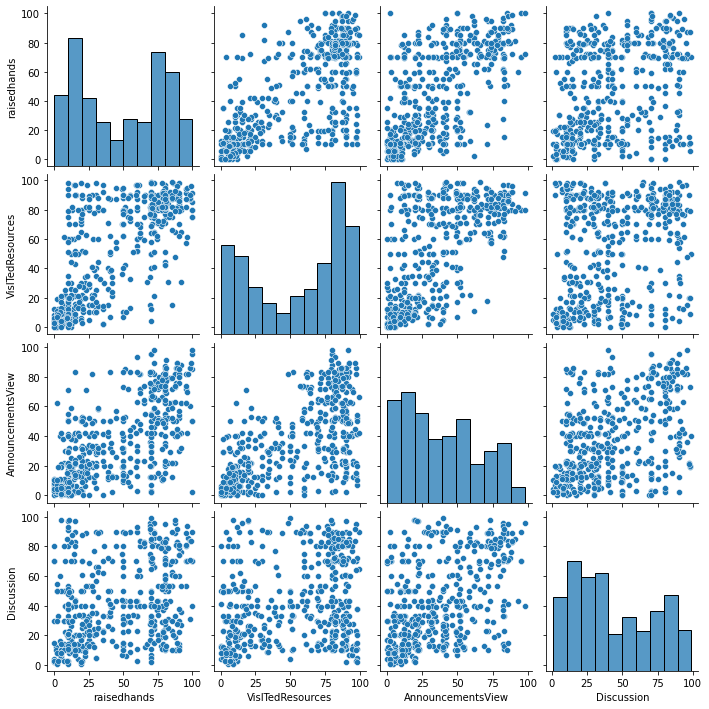

In [31]:
# adding pairplot to help with visualization
sns.pairplot(edu)

### Data cleaning
*By Xena Valenzuela*

From the data quality check we realized that:
...

The code below implements the above cleaning.

In [32]:
#We realized that we needed to make a subset of the training dataset in order to make a feasable training and testing dataset
edu_train = edu.copy()
edu_train.head(5)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [33]:
# get two grades
edu_train = edu_train.loc[edu['GradeID'].isin(['G-07','G-08'])]
edu_train

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
6,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,35,12,0,17,No,Bad,Above-7,L
7,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,10,15,22,Yes,Good,Under-7,M
8,F,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,12,21,16,50,Yes,Good,Under-7,M
9,F,KW,KuwaIT,MiddleSchool,G-07,B,IT,F,Father,70,80,25,70,Yes,Good,Under-7,M
10,M,KW,KuwaIT,MiddleSchool,G-07,A,Math,F,Father,50,88,30,80,Yes,Good,Under-7,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,S,Father,5,4,5,8,No,Bad,Above-7,L
476,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,F,Father,50,77,14,28,No,Bad,Under-7,M
477,F,Jordan,Jordan,MiddleSchool,G-08,A,Geology,S,Father,55,74,25,29,No,Bad,Under-7,M
478,F,Jordan,Jordan,MiddleSchool,G-08,A,History,F,Father,30,17,14,57,No,Bad,Above-7,L


In [34]:
# drop stageID, sectionID, semester, relation, parentansweringsurvey, parentschoolsatisfaction, all values that were categorical were dropped 
edu_train = edu_train.drop(['NationalITy', 'PlaceofBirth', 'StageID', 'SectionID', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction'], axis = 1)
edu_train.head(5)

,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
6,M,G-07,Math,35,12,0,17,Above-7,L
7,M,G-07,Math,50,10,15,22,Under-7,M
8,F,G-07,Math,12,21,16,50,Under-7,M
9,F,G-07,IT,70,80,25,70,Under-7,M
10,M,G-07,Math,50,88,30,80,Under-7,H


In [35]:
#we wanted to see the distribution of the topics to see if there were relatively well distributed
edu_train['Topic'].value_counts()

Biology      30
Arabic       28
Spanish      24
Chemistry    24
Geology      24
IT           21
Science      19
Quran        17
Math         16
History      12
English       2
Name: Topic, dtype: int64

In [36]:
# drop English topic because there are only two observations 
edu_train = edu_train[edu_train.Topic != 'English']
edu_train

,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
6,M,G-07,Math,35,12,0,17,Above-7,L
7,M,G-07,Math,50,10,15,22,Under-7,M
8,F,G-07,Math,12,21,16,50,Under-7,M
9,F,G-07,IT,70,80,25,70,Under-7,M
10,M,G-07,Math,50,88,30,80,Under-7,H
...,...,...,...,...,...,...,...,...,...
475,F,G-08,Chemistry,5,4,5,8,Above-7,L
476,F,G-08,Geology,50,77,14,28,Under-7,M
477,F,G-08,Geology,55,74,25,29,Under-7,M
478,F,G-08,History,30,17,14,57,Above-7,L


In [37]:
#applying the same logic from topics to class 
edu_train['Class'].value_counts()

M    101
H     62
L     52
Name: Class, dtype: int64

In [39]:
# drop low since we want to make a logistical regression and a binary response variable 
edu_train = edu_train[edu_train.Class != 'L']
edu_train.head(5)

,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
7,M,G-07,Math,50,10,15,22,Under-7,M
8,F,G-07,Math,12,21,16,50,Under-7,M
9,F,G-07,IT,70,80,25,70,Under-7,M
10,M,G-07,Math,50,88,30,80,Under-7,H
11,M,G-07,Math,19,6,19,12,Under-7,M


In [40]:
#we needed a test day, so we used the sixth grade for data testing
edu_test = edu.copy()

# we subsetted the sixth grade
edu_test = edu_test.loc[edu_test['GradeID'].isin(['G-06'])]

In [41]:
#performing all the same changes we did to the last dataframe 
edu_test = edu_test.drop(['NationalITy', 'PlaceofBirth', 'StageID', 'SectionID', 'Semester', 'Relation', 'ParentAnsweringSurvey', 'ParentschoolSatisfaction'], axis = 1)
edu_test = edu_test[edu_test.Class != 'L']
edu_test['Class'].replace(to_replace = {'M': 0, 'H': 1}, inplace = True)
edu_test.head()

,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
15,F,G-06,IT,30,40,22,66,Under-7,0
245,F,G-06,IT,50,40,52,66,Under-7,0
246,F,G-06,Science,80,94,62,77,Under-7,1
247,F,G-06,Math,87,48,82,96,Above-7,0
264,F,G-06,English,70,64,42,32,Under-7,0


### Data preparation
*By Sankaranarayanan Balasubramanian and Chun-Li*

The following data preparation steps helped us to prepare our data for implementing various modeling / validation techniques:

1. Since we need to predict house price, we derived some new predictors *(from existing predictors)* that intuitively seem to be helpuful to predict house price. 

2. We have shuffled the dataset to prepare it for K-fold cross validation.

3. We have created a standardized version of the dataset, as we will use it to develop Lasso / Ridge regression models.

In [42]:
#This makes the class an official response variable
edu_train['Class'].replace(to_replace = {'M': 0, 'H': 1}, inplace = True)
edu_train.head(5)

,gender,GradeID,Topic,raisedhands,VisITedResources,AnnouncementsView,Discussion,StudentAbsenceDays,Class
7,M,G-07,Math,50,10,15,22,Under-7,0
8,F,G-07,Math,12,21,16,50,Under-7,0
9,F,G-07,IT,70,80,25,70,Under-7,0
10,M,G-07,Math,50,88,30,80,Under-7,1
11,M,G-07,Math,19,6,19,12,Under-7,0


In [43]:
#In the idea that we want to prepare our data for subset selection, it was necessary to make sure that we can perform it using dummy variables
edutrain_dummies = pd.get_dummies(edu_train)
edutrain_dummies.head(5)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,GradeID_G-07,GradeID_G-08,Topic_Arabic,...,Topic_Chemistry,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
7,50,10,15,22,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
8,12,21,16,50,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
9,70,80,25,70,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
10,50,88,30,80,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
11,19,6,19,12,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [44]:
#since the names can cause problems in the regression process, I renamed them to be more model friendly
Y = [s.replace('-', '_') for s in edutrain_dummies.columns.to_list()]
edutrain_dummies.columns = Y
edutrain_dummies.head(5)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,GradeID_G_07,GradeID_G_08,Topic_Arabic,...,Topic_Chemistry,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,StudentAbsenceDays_Above_7,StudentAbsenceDays_Under_7
7,50,10,15,22,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
8,12,21,16,50,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
9,70,80,25,70,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
10,50,88,30,80,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
11,19,6,19,12,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [45]:
#utilizing the same methods of changing the edu_train dummies, we needed to do the same for the test 
edutest_dummies = pd.get_dummies(edu_test)
edutest_dummies.head(5)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,GradeID_G-06,Topic_English,Topic_IT,Topic_Math,Topic_Science,StudentAbsenceDays_Above-7,StudentAbsenceDays_Under-7
15,30,40,22,66,0,1,0,1,0,1,0,0,0,1
245,50,40,52,66,0,1,0,1,0,1,0,0,0,1
246,80,94,62,77,1,1,0,1,0,0,0,1,0,1
247,87,48,82,96,0,1,0,1,0,0,1,0,1,0
264,70,64,42,32,0,1,0,1,1,0,0,0,0,1


In [46]:
#since the names can cause problems in the regression process, I renamed them to be more model friendly
Y = [s.replace('-', '_') for s in edutest_dummies.columns.to_list()]
edutest_dummies.columns = Y
edutest_dummies.head(5)

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,GradeID_G_06,Topic_English,Topic_IT,Topic_Math,Topic_Science,StudentAbsenceDays_Above_7,StudentAbsenceDays_Under_7
15,30,40,22,66,0,1,0,1,0,1,0,0,0,1
245,50,40,52,66,0,1,0,1,0,1,0,0,0,1
246,80,94,62,77,1,1,0,1,0,0,0,1,0,1
247,87,48,82,96,0,1,0,1,0,0,1,0,1,0
264,70,64,42,32,0,1,0,1,1,0,0,0,0,1


## Exploratory data analysis

In [47]:
# use vif to analyze continuous variables
continuous_vars = edu[['raisedhands','VisITedResources','AnnouncementsView','Discussion']]

continuous_vars.columns[1:]

continuous_vars = add_constant(continuous_vars)
vif_data = pd.DataFrame()
vif_data["feature"] = continuous_vars.columns

for i in range(len(continuous_vars.columns)):
    vif_data.loc[i,'VIF'] = variance_inflation_factor(continuous_vars.values, i)

print(vif_data)

             feature       VIF
0              const  5.248221
1        raisedhands  2.317627
2   VisITedResources  2.076660
3  AnnouncementsView  2.003386
4         Discussion  1.228993


<AxesSubplot:>

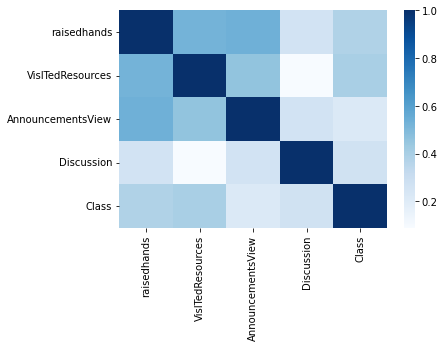

In [48]:
# correlation heatmap for predictors
sns.heatmap(edu_train.corr(), cmap = 'Blues')

All predictors have values less than 5, so do not need to get rid of any due to multicollinearity.

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

## Developing the model

Put code with comments. The comments should explain the code such that it can be easily understood. You may put text *(in a markdown cell)* before a large chunk of code to explain the overall purpose of the code, if it is not intuitive. **Put the name of the person / persons who contributed to each code chunk / set of code chunks.**

In [49]:
# developing inital model with 6 predictors
model1 = smf.logit(formula = 'Class~gender+raisedhands+VisITedResources+AnnouncementsView+Discussion+StudentAbsenceDays', data = edu_train).fit()
model1.summary()

Optimization terminated successfully.
         Current function value: 0.442542
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  163
Model:                          Logit   Df Residuals:                      156
Method:                           MLE   Df Model:                            6
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.3338
Time:                        20:31:37   Log-Likelihood:                -72.134
converged:                       True   LL-Null:                       -108.27
Covariance Type:            nonrobust   LLR p-value:                 1.395e-13
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -8.8299      1.708     -5.171      0.000     -12.177      -5.483
gender[T.M]                      -1.3045      0.476     -2.740      0.006      -2.238      -0.371
StudentAbsenceDays[T.Under-7]     2.2674      0.796      2.849      0.004       0.707       3.827
raisedhands                       0.0250      0.012      2.158      0.031       0.002       0.048
VisITedResources                  0.0550      0.017      3.148      0.002       0.021       0.089
AnnouncementsView                 0.0014      0.010      0.134      0.893      -0.019       0.021
Discussion                        0.0204      0.008      2.439      0.015       0.004       0.037
=================================================================================================
"""

In [50]:
# define function to compute confusion matrix and prediction accuracy on test/train data, 0.1 cutoff
def confusion_matrix_data(data,actual_values,model,cutoff=0.1):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 65.0%
Precision = 52.1%
TPR or Recall = 98.4%
FNR = 1.6%
FPR = 55.4%
ROC-AUC = 86.4%


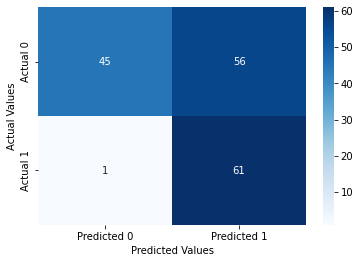

In [51]:
# running the confusion matrix
confusion_matrix_data(edu_train, edu_train.Class, model1)

In [52]:
pred_class = model1.predict(edu_test)
pred_class

15     0.096737
245    0.155446
246    0.906027
247    0.125585
264    0.358812
265    0.711294
266    0.007423
267    0.004618
268    0.000098
269    0.000461
270    0.729591
271    0.725637
272    0.004811
273    0.003411
274    0.865975
275    0.606794
276    0.012744
277    0.037264
278    0.028499
279    0.039297
280    0.217790
281    0.131981
282    0.937979
283    0.925367
284    0.001899
285    0.002195
286    0.729586
287    0.841498
288    0.322416
289    0.413903
dtype: float64

Classification accuracy = 70.0%
Precision = 64.7%
TPR or Recall = 78.6%
FNR = 21.4%
FPR = 37.5%
ROC-AUC = 82.1%


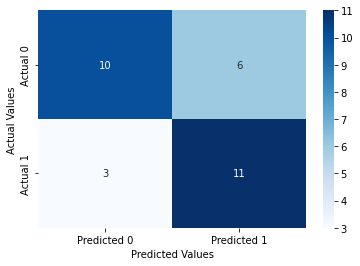

In [53]:
# running confusion matrix data with test data
confusion_matrix_data(edu_test, edu_test.Class, model1)


In [54]:
# second model, want to see how gender interacts with class participation (discussion and raising hands)
model2 = smf.logit(formula = 'Class ~ gender*Discussion + gender*raisedhands + VisITedResources + AnnouncementsView + StudentAbsenceDays', data = edu_train).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.427232
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  163
Model:                          Logit   Df Residuals:                      154
Method:                           MLE   Df Model:                            8
Date:                Sun, 12 Mar 2023   Pseudo R-squ.:                  0.3568
Time:                        20:36:58   Log-Likelihood:                -69.639
converged:                       True   LL-Null:                       -108.27
Covariance Type:            nonrobust   LLR p-value:                 1.733e-13
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -8.2351      1.920     -4.288      0.000     -11.999      -4.471
gender[T.M]                      -1.5755      1.703     -0.925      0.355      -4.914       1.763
StudentAbsenceDays[T.Under-7]     2.6446      0.855      3.094      0.002       0.969       4.320
Discussion                       -0.0052      0.015     -0.340      0.734      -0.035       0.025
gender[T.M]:Discussion            0.0381      0.019      2.035      0.042       0.001       0.075
raisedhands                       0.0360      0.015      2.383      0.017       0.006       0.066
gender[T.M]:raisedhands          -0.0257      0.022     -1.180      0.238      -0.068       0.017
VisITedResources                  0.0471      0.018      2.672      0.008       0.013       0.082
AnnouncementsView                 0.0065      0.011      0.610      0.542      -0.014       0.028
=================================================================================================
"""

Classification accuracy = 66.3%
Precision = 53.1%
TPR or Recall = 96.8%
FNR = 3.2%
FPR = 52.5%
ROC-AUC = 87.6%


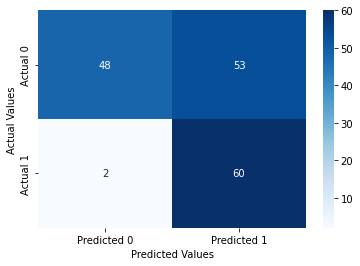

In [55]:
# matrix for train data - model2
confusion_matrix_data(edu_train, edu_train.Class, model2)

Classification accuracy = 73.3%
Precision = 68.8%
TPR or Recall = 78.6%
FNR = 21.4%
FPR = 31.2%
ROC-AUC = 82.1%


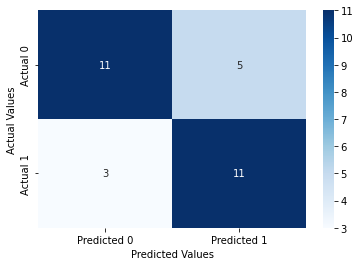

In [56]:
# matrix for test data - model2
confusion_matrix_data(edu_test, edu_test.Class, model2)

### Code fitting the final model

In [58]:
edutrain_dummies

,raisedhands,VisITedResources,AnnouncementsView,Discussion,Class,gender_F,gender_M,GradeID_G_07,GradeID_G_08,Topic_Arabic,...,Topic_Chemistry,Topic_Geology,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,StudentAbsenceDays_Above_7,StudentAbsenceDays_Under_7
7,50,10,15,22,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
8,12,21,16,50,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
9,70,80,25,70,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
10,50,88,30,80,1,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
11,19,6,19,12,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,78,82,78,53,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,1
472,80,87,74,68,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
473,85,88,79,70,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
476,50,77,14,28,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


Put the code(s) that fit the final model(s) in separate cell(s), i.e., the code with the `.ols()` or `.logit()` functions.

In [61]:
# from model2, some predictors not significant, so use forward stepwise selection to select for best model
X = edutrain_dummies[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'gender_F', 'StudentAbsenceDays_Above_7']]
X_backup = edutrain_dummies[['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion', 'gender_F', 'StudentAbsenceDays_Above_7']]
X_backup

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_F,StudentAbsenceDays_Above_7
7,50,10,15,22,0,0
8,12,21,16,50,1,0
9,70,80,25,70,1,0
10,50,88,30,80,0,0
11,19,6,19,12,0,0
...,...,...,...,...,...,...
471,78,82,78,53,0,0
472,80,87,74,68,0,0
473,85,88,79,70,0,0
476,50,77,14,28,1,0


In [84]:
# Function to develop a model based on all predictors in predictor_subset
def processSubset(predictor_subset):
    # Fit model on feature_set and calculate R-squared
    model = smf.logit('Class~' + '+'.join(predictor_subset), data = edutrain_dummies).fit()
    return {"model":model}

In [85]:
# Including 2-factor interactions of predictors in train and 'X'
for combo in itertools.combinations(X_backup.columns, 2):    
    edutrain_dummies['_'.join(combo)] = edutrain_dummies[combo[0]]*edutrain_dummies[combo[1]]
    edutest_dummies['_'.join(combo)] = edutest_dummies[combo[0]]*edutest_dummies[combo[1]]
    X.loc[:,'_'.join(combo)] = edutrain_dummies.loc[:,'_'.join(combo)] 

/var/folders/wy/h6ms0d9x5mb69xv5ynq_lm5m0000gn/T/ipykernel_12342/4016564596.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[:,'_'.join(combo)] = edutrain_dummies.loc[:,'_'.join(combo)]


In [86]:
# Function to find the best predictor out of p-k predictors and add it to the model containing the k predictors
def forward(predictors):

    # Pull out predictors we still need to process
    remaining_predictors = [p for p in X.columns if p not in predictors]
    
    tic = time.time()
    
    results = []
    
    for p in remaining_predictors:
        results.append(processSubset(predictors+[p]))
    
    # Wrap everything up in a nice dataframe
    models = pd.DataFrame(results)
    
    # Choose the model with the highest RSS
    #best_model = models.loc[models['Rsquared'].argmax()]
    
    toc = time.time()
    print("Processed ", models.shape[0], "models on", len(predictors)+1, "predictors in", (toc-tic), "seconds.")
    
    # Return the best model, along with some other useful information about the model
    #return best_model

In [87]:
def forward_selection():
    models_best = pd.DataFrame(columns=["model"])

    tic = time.time()
    predictors = []

    for i in range(1,len(X.columns)+1):    
        models_best.loc[i] = forward(predictors)
        predictors = list(models_best.loc[i]["model"].params.index[1:])

    toc = time.time()
    print("Total elapsed time:", (toc-tic), "seconds.")
    return models_best

In [88]:
models_best = forward_selection()

Optimization terminated successfully.
         Current function value: 0.582037
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.554142
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.639631
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626874
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.650362
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.603466
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.549259
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615409
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.570122
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.626039
  

/var/folders/wy/h6ms0d9x5mb69xv5ynq_lm5m0000gn/T/ipykernel_12342/1418934268.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  models_best.loc[i] = forward(predictors)


AttributeError: 'numpy.float64' object has no attribute 'params'

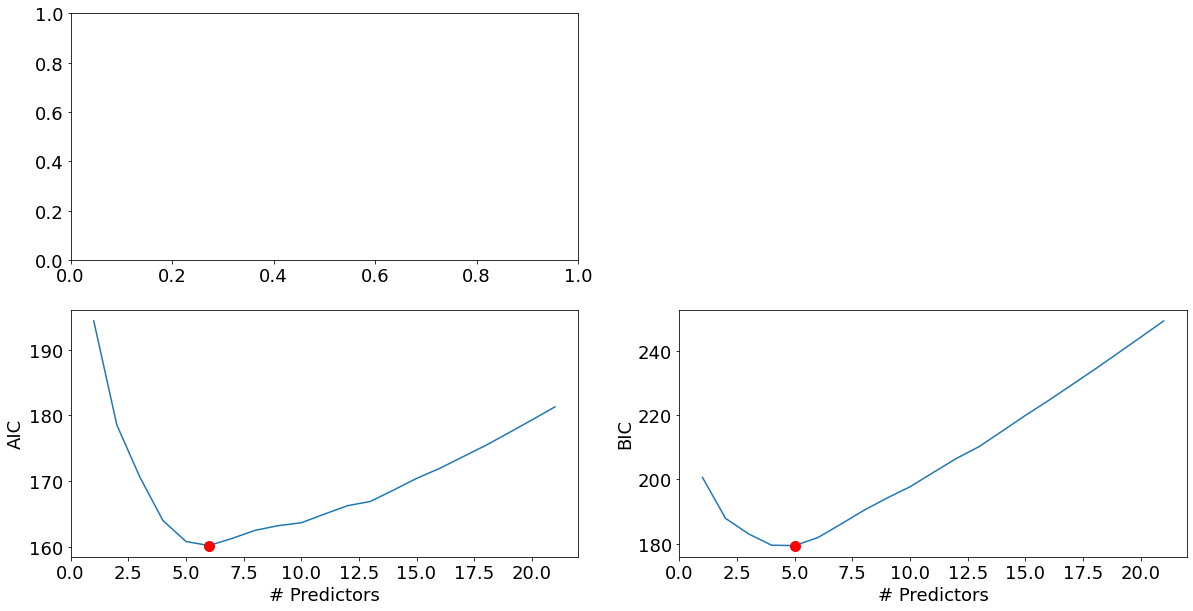

In [90]:
def best_sub_plots():
    plt.figure(figsize=(20,10))
    plt.rcParams.update({'font.size': 18, 'lines.markersize': 10})

    # Set up a 2x2 grid so we can look at 4 plots at once
    plt.subplot(2, 2, 1)

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector
    #plt.plot(models_best["Rsquared"])
    #plt.xlabel('# Predictors')
    #plt.ylabel('Rsquared')

    # We will now plot a red dot to indicate the model with the largest adjusted R^2 statistic.
    # The argmax() function can be used to identify the location of the maximum point of a vector

   # rsquared_adj = models_best.apply(lambda row: row[1].rsquared_adj, axis=1)

    #plt.subplot(2, 2, 2)
    #plt.plot(rsquared_adj)
    #plt.plot(1+rsquared_adj.argmax(), rsquared_adj.max(), "or")
    #plt.xlabel('# Predictors')
    #plt.ylabel('adjusted rsquared')

    # We'll do the same for AIC and BIC, this time looking for the models with the SMALLEST statistic
    aic = models_best.apply(lambda row: row[1].aic, axis=1)

    plt.subplot(2, 2, 3)
    plt.plot(aic)
    plt.plot(1+aic.argmin(), aic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('AIC')

    bic = models_best.apply(lambda row: row[1].bic, axis=1)

    plt.subplot(2, 2, 4)
    plt.plot(bic)
    plt.plot(1+bic.argmin(), bic.min(), "or")
    plt.xlabel('# Predictors')
    plt.ylabel('BIC')
best_sub_plots()


In [91]:
best_fwd_reg_model = models_best['model'][5]
best_fwd_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Class   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     19.33
Date:                Sun, 12 Mar 2023   Prob (F-statistic):           5.71e-15
Time:                        21:20:01   Log-Likelihood:                -74.397
No. Observations:                 163   AIC:                             160.8
Df Residuals:                     157   BIC:                             179.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
Intercept                                       -0.0362      0.073     -0.497      0.620      -0.180       0.108
raisedhands_VisITedResources                  4.191e-05   1.54e-05      2.722      0.007    1.15e-05    7.23e-05
AnnouncementsView_StudentAbsenceDays_Above_7    -0.0066      0.001     -4.745      0.000      -0.009      -0.004
AnnouncementsView_gender_F                       0.0087      0.002      3.644      0.000       0.004       0.013
VisITedResources_Discussion                   5.747e-05   1.61e-05      3.559      0.000    2.56e-05    8.94e-05
Discussion_gender_F                             -0.0047      0.002     -2.255      0.025      -0.009      -0.001
==============================================================================
Omnibus:                       10.254   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                4.628
Skew:                           0.140   Prob(JB):                       0.0989
Kurtosis:                       2.224   Cond. No.                     1.68e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Classification accuracy = 52.4%
Precision = 50.0%
TPR or Recall = 80.0%
FNR = 20.0%
FPR = 72.7%
ROC-AUC = 84.4%


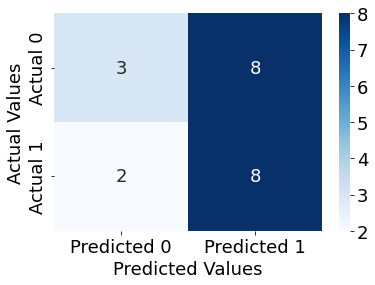

In [92]:
confusion_matrix_data(edutest_dummies, edutest_dummies.Class, best_fwd_reg_model)

## Conclusions and Recommendations to stakeholder(s)

You may or may not have code to put in this section. Delete this section if it is irrelevant.